In [69]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import geopandas as geo
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.axes_grid1 import make_axes_locatable


%matplotlib inline

### Import Unemployment Data

In [70]:
root = 'C:/Users/Aaron/PycharmProjects/ECE-225'
data_path = Path(root + '/data/output.csv')
df = pd.read_csv(data_path)

In [71]:
df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [72]:
df.describe()

,Year,Rate
count,885548.000000,885548.000000
mean,2003.000017,6.175010
std,7.824893,3.112535
min,1990.000000,0.000000
25%,1996.000000,4.000000
50%,2003.000000,5.500000
75%,2010.000000,7.700000
max,2016.000000,58.400000


In [73]:
df_ny = df[df.State == 'New York']

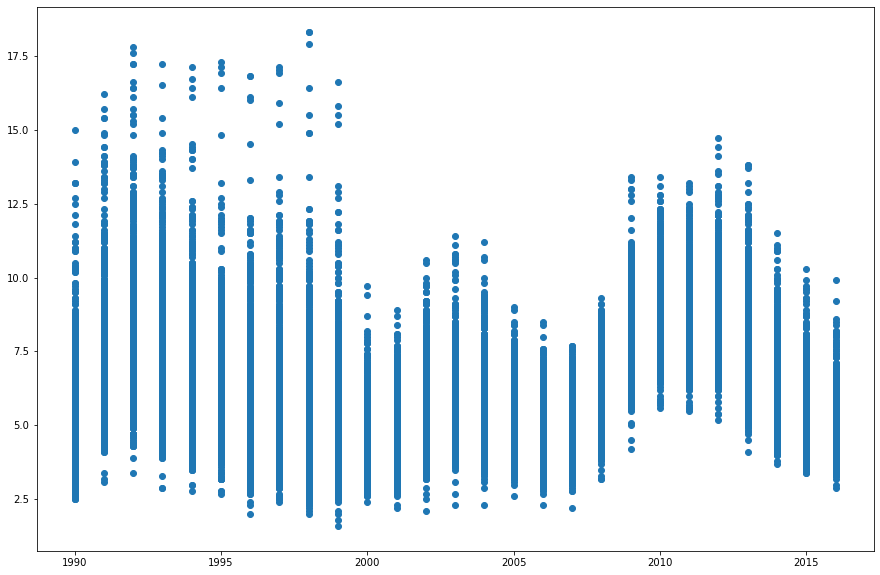

In [74]:
plt.figure(figsize=(15,10))

plt.scatter(df_ny.Year, df_ny.Rate)

In [75]:
sorted(df_ny.Year.unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [76]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [77]:
# Need to sort the values then fit, Normalization is remaining, Look into Timeseries analysis

In [78]:
# reg.fit(df_ny.Year.values[None][:, :15000].reshape(-1,1), df_ny.Rate.values[None][:, :15000].reshape(-1,1))

In [79]:
# preds = reg.predict(df_ny.Year.values[15000:][None].reshape(-1,1))

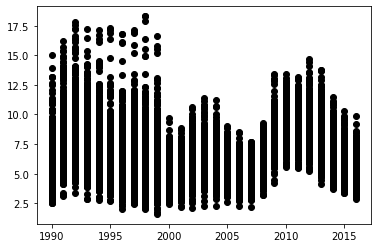

In [80]:
# Plot outputs
plt.scatter(df_ny.Year,df_ny.Rate ,  color='black')

In [81]:
# plt.scatter(df_ny.Year.values[15000:], preds.reshape((-1)), color='Blue', linewidth=1)

#### Import .shp file data for counties

In [82]:
shp_counties = Path(root + "/data/UScounties/uscounties.shp")

c_map = geo.read_file(shp_counties)
c_map = c_map[c_map.STATE_NAME != 'Alaska']
c_map = c_map[c_map.STATE_NAME != 'Hawaii']
c_map.rename(columns={'NAME':'County', 'STATE_NAME':'State'}, inplace=True)

df.County.convert_dtypes()
c_map.County.convert_dtypes()


0       Lake of the Woods
1                   Ferry
2                 Stevens
3                Okanogan
4            Pend Oreille
              ...        
3104             LaGrange
3105              Steuben
3132         Pittsylvania
3133             Danville
3140           Broomfield
Name: County, Length: 3109, dtype: string

In [83]:
c_map.head()

,County,State,STATE_FIPS,CNTY_FIPS,FIPS,geometry
0,Lake of the Woods,Minnesota,27,077,27077,"POLYGON ((-95.34283 48.54668, -95.34105 48.715..."
1,Ferry,Washington,53,019,53019,"POLYGON ((-118.85163 47.94956, -118.84846 48.4..."
2,Stevens,Washington,53,065,53065,"POLYGON ((-117.43883 48.04412, -117.54219 48.0..."
3,Okanogan,Washington,53,047,53047,"POLYGON ((-118.97209 47.93915, -118.97406 47.9..."
4,Pend Oreille,Washington,53,051,53051,"POLYGON ((-117.43858 48.99992, -117.03205 48.9..."


### Merge data with shp to gain geo poly

In [84]:
# Clean Data and Merge
df['County'] = df.County.str.replace('County', '')
# df.insert(5, "geometry", 0, True)
#
# for i in range(len(df.County)):
#     dcounty = df.iloc[i].at['County']
#     dstate = df.iloc[i].at['State']
#     df.iloc[i].at['geometry'] = c_map.iloc[(c_map['County'] == dcounty) & (c_map['State'] == dstate)].at['geometry']

df1 = df[['County', 'State']]
df2 = c_map[['County','State','geometry']]
m = pd.merge(df1, df2, indicator=True)
geodata = geo.geodataframe.GeoDataFrame(m, geometry=m.geometry)
m.head(10)

,County,State,geometry,_merge
0,Baltimore City,Maryland,"POLYGON ((-76.57667 39.19823, -76.61064 39.224...",both
1,Baltimore City,Maryland,"POLYGON ((-76.57667 39.19823, -76.61064 39.224...",both
2,Baltimore City,Maryland,"POLYGON ((-76.57667 39.19823, -76.61064 39.224...",both
3,Baltimore City,Maryland,"POLYGON ((-76.57667 39.19823, -76.61064 39.224...",both
4,Baltimore City,Maryland,"POLYGON ((-76.57667 39.19823, -76.61064 39.224...",both
5,Baltimore City,Maryland,"POLYGON ((-76.57667 39.19823, -76.61064 39.224...",both
6,Baltimore City,Maryland,"POLYGON ((-76.57667 39.19823, -76.61064 39.224...",both
7,Baltimore City,Maryland,"POLYGON ((-76.57667 39.19823, -76.61064 39.224...",both
8,Baltimore City,Maryland,"POLYGON ((-76.57667 39.19823, -76.61064 39.224...",both
9,Baltimore City,Maryland,"POLYGON ((-76.57667 39.19823, -76.61064 39.224...",both


In [85]:
df['County'].value_counts().head(10)

Washington     8930
Jefferson      7334
Lincoln        7107
Franklin       6986
Jackson        6654
Montgomery     5366
Madison        5366
Clay           5066
Union          4839
Monroe         4807
Name: County, dtype: int64

In [86]:
# c_map.sort_values(by='County', inplace=True)
test = c_map.drop(columns='geometry')
# test.head()
test.sort_values(by='County', inplace=True)
test.value_counts().head(10)
# test = c_map['counts'] = c_map['County'].map(df['County'].value_counts())
# test.head(10)

County     State          STATE_FIPS  CNTY_FIPS  FIPS 
Ziebach    South Dakota   46          137        46137    1
Gem        Idaho          16          045        16045    1
Glasscock  Texas          48          173        48173    1
Glascock   Georgia        13          125        13125    1
Gladwin    Michigan       26          051        26051    1
Glades     Florida        12          043        12043    1
Glacier    Montana        30          035        30035    1
Gilpin     Colorado       08          047        08047    1
Gilmer     West Virginia  54          021        54021    1
           Georgia        13          123        13123    1
dtype: int64

In [87]:
print(np.array(df['County'].unique()).shape)
print(np.array(c_map['County'].unique()).shape)
print(geodata.shape)
print(df.shape)
print(m.shape)

(1752,)
(1806,)
(1848, 4)
(885548, 5)
(1848, 4)


### Plot with Slider

interactive(children=(IntSlider(value=1990, description='Year', max=2016, min=1990), Dropdown(description='Mon…

<function __main__.plotmap(y, m)>

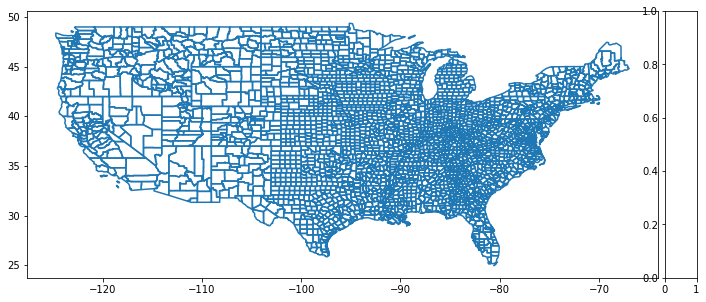

In [88]:
months = ["January", "February", "March","April", "May", "June", "July", "August","September", "October","November" , "December" ]
def plotmap(y, m):
    fig, ax = plt.subplots(1, figsize=(12,12))
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="5%", pad=0.1)
    c_map.boundary.plot(ax=ax)
    newdata = geodata[(geodata['Year'] == y) & (geodata['Month'] == m)]
    newdata.plot(column='Rate',ax=ax, legend=True, cax=cax)
    display(newdata.shape)
year_s = widgets.IntSlider(min=np.min(df.Year), max=np.max(df.Year), description="Year")
mon_s = widgets.Dropdown(options=months, description="Month", value="January")
widgets.interact(plotmap, y=year_s, m=mon_s)